<a href="https://colab.research.google.com/github/peruvianox/kT-Fp-MetCost/blob/main/KtFpCorrActLen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data and Packages

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")
DataFolder = '/content/drive/My Drive/ktFpMetCost/'
os.chdir(DataFolder)

import matplotlib.pyplot as plt
import pandas as pd   
import numpy as np
from matplotlib.patches import Rectangle

MetCost = pd.read_csv(DataFolder + 'MetCostSimp.csv')
Acts = pd.read_csv(DataFolder + 'ActsSimp.csv').fillna(0.02)  # fill empty (NaN) values with the minimum metabolic cost (0.02) 
FibLens = pd.read_csv(DataFolder + 'FibLensSimp.csv')

Mounted at /content/drive


# Compile & Plot Data for All, Main, Hip, or Ankle muscle sets

In [ ]:
# define muscle sets
MainMusc = ['glut_med','rect_fem','soleus','glut_max','psoas', 'iliacus',
            'bifemsh','tib_ant','med_gas','semimem','vas_lat','bifemlh']
HipMusc = ['glut_med','rect_fem','glut_max','psoas', 'iliacus',
          'bifemsh','semimem','bifemlh']
AnkMusc = ['soleus','tib_ant','med_gas']
# set up output dataFrame
Out = pd.DataFrame(columns = ['Muscle', 'Met Cost','Act', 'FibLen', 'Fp Cond', 'Strain'])

MuscSet = MainMusc # State which set to use

i = 0
for S in np.unique(MetCost['StrnLvl']):
  for C in np.unique(MetCost['Cond']):
    # for m in np.unique(MetCost['Muscles']):
    for m in MuscSet:
      if m == 'Total':
        continue
      O = []
      for D in [MetCost, Acts, FibLens]:
        # identify trials that match desired conditions
        MuscInds = [x for x, z in enumerate(D['Muscles'].tolist()) if z == m]
        CondInds = [x for x, z in enumerate(D['Cond'].tolist()) if z == C]
        StrnInds = [x for x, z in enumerate(D['StrnLvl'].tolist()) if z == S]
        match = list(set(MuscInds) & set(CondInds) & set(StrnInds))
        match.sort()
        O.append(np.nanmean(D.iloc[match, 5:]))
        
      Out.loc[i, :] = [m, O[0], O[1], O[2], C, S]
      i+=1

In [ ]:
pip list

In [ ]:
Out

In [ ]:
pearsonr(X, Y)

(0.5412313339458128, 3.143638463606458e-24)

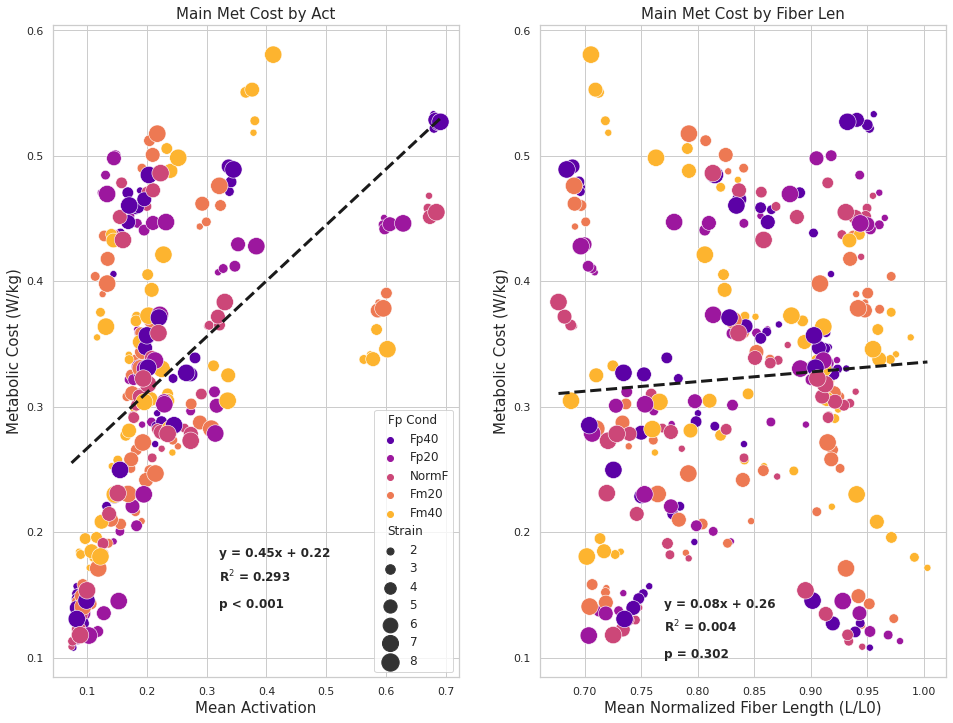

In [ ]:
import seaborn as sb
from scipy.stats import pearsonr
sb.set(font_scale=2)
Muscles = 'Main'
plt.rcParams.update({'font.size': 15})
sb.set_theme(style="whitegrid")
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


# activation by metabolic cost
sb.scatterplot(data=Out, x='Act', y='Met Cost', markers='o',
                size='Strain', sizes=(50, 300), hue='Fp Cond', palette='plasma',
               hue_order=['Fp40','Fp20','NormF','Fm20','Fm40'], legend='brief', ax=ax1)

X = list(Out.iloc[:,2])
Y = list(Out.iloc[:,1])    
R, Pval = pearsonr(X, Y)
R2 = R ** 2
Xrange = np.linspace(min(X), max(X))
P = np.polyfit(X, Y, 1)
Ynew = np.polyval(P, Xrange)
ax1.plot(Xrange, Ynew, '--k', lw = 3)
a = str(round(P[0],2))
b = str(round(P[1],2))
ax1.text(0.32, 0.18, 'y = ' + a + 'x + ' + b, weight='bold')
ax1.text(0.32, 0.16, 'R$^2$ = ' + str(round(R2,3)), weight='bold')
ax1.text(0.32, 0.14, 'p < 0.001', weight='bold')

ax1.set_title(Muscles + ' Met Cost by Act', fontsize=15)
ax1.set_xlabel('Mean Activation', fontsize=15)
ax1.set_ylabel('Metabolic Cost (W/kg)', fontsize=15)


# Fiber length by metabolic cost
sb.scatterplot(data=Out, x='FibLen', y='Met Cost', markers='o', 
               hue_order=['Fp40','Fp20','NormF','Fm20','Fm40'], palette='plasma',
                size='Strain', sizes=(50, 300), hue='Fp Cond', legend=False, ax=ax2)

X = list(Out.iloc[:,3])
Y = list(Out.iloc[:,1])    
R, Pval = pearsonr(X, Y)
R2 = R ** 2
Xrange = np.linspace(min(X), max(X))
P = np.polyfit(X, Y, 1)
Ynew = np.polyval(P, Xrange)
ax2.plot(Xrange, Ynew, '--k', lw = 3)
a = str(round(P[0],2))
b = str(round(P[1],2))
ax2.text(0.77, 0.14, 'y = ' + a + 'x + ' + b, weight='bold')
ax2.text(0.77, 0.12, 'R$^2$ = ' + str(round(R2,3)), weight='bold')
ax2.text(0.77, 0.10, 'p = ' + str(round(Pval,3)), weight='bold')

ax2.set_title(Muscles + ' Met Cost by Fiber Len', fontsize=15)
ax2.set_xlabel('Mean Normalized Fiber Length (L/L0)', fontsize=15)
ax2.set_ylabel('Metabolic Cost (W/kg)', fontsize=15)

plt.savefig('ActFLbyMC_' + Muscles + '.png')
plt.savefig('ActFLbyMC_' + Muscles + '.pdf')

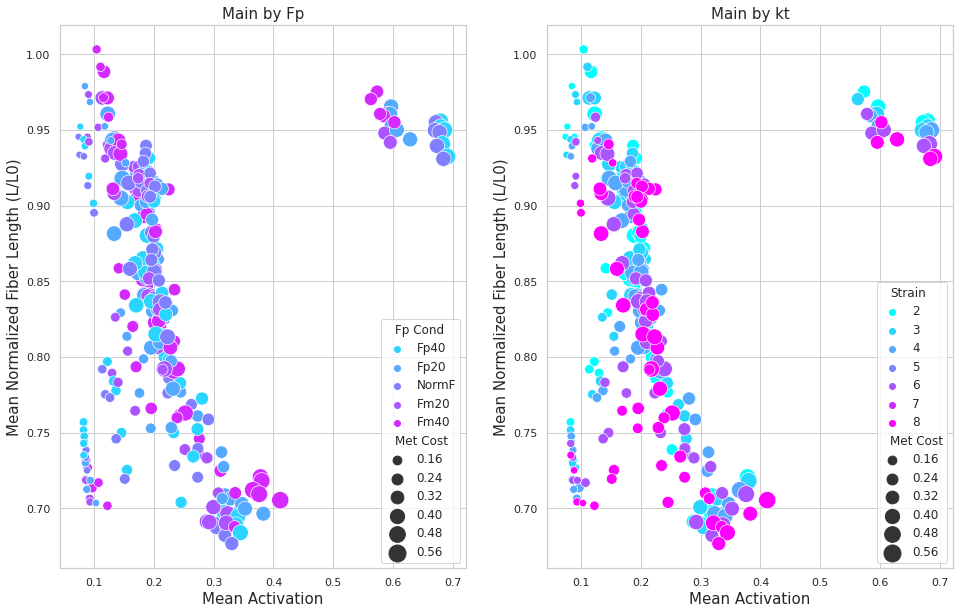

In [ ]:
import seaborn as sb

sb.set_theme(style="whitegrid")
fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

sb.scatterplot(data=Out, x='Act', y='FibLen', markers='o',
               hue_order=['Fp40','Fp20','NormF','Fm20','Fm40'], palette='cool',
                size='Met Cost', sizes=(50, 300), hue='Fp Cond', legend='brief', ax=ax1)

sb.scatterplot(data=Out, x='Act', y='FibLen', markers='o',
               hue_order=['2','3','4','6','8'], palette='cool',
                size='Met Cost', sizes=(50, 300), hue='Strain', legend='brief', ax=ax2)

ax1.set_title(Muscles + ' by Fp', fontsize=15)
ax1.set_xlabel('Mean Activation', fontsize=15)
ax1.set_ylabel('Mean Normalized Fiber Length (L/L0)', fontsize=15)

ax2.set_title(Muscles + ' by kt', fontsize=15)
ax2.set_xlabel('Mean Activation', fontsize=15)
ax2.set_ylabel('Mean Normalized Fiber Length (L/L0)', fontsize=15)


plt.savefig('ActbyFL_' + Muscles + '.png')
plt.savefig('ActbyFL_' + Muscles + '.pdf')